# 라이브러리 불러오기

In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# 데이터 불러오기

In [2]:
billboard = pd.read_csv("data/billboard.csv")
billboard.head(5)

,artist,track,date_entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2 Pac,Baby Don't Cry (Keep...,2000-02-26,87,82.00,72.00,77.00,87.00,94.00,99.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2Ge+her,The Hardest Part Of ...,2000-09-02,91,87.00,92.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3 Doors Down,Kryptonite,2000-04-08,81,70.00,68.00,67.00,66.00,57.00,54.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3 Doors Down,Loser,2000-10-21,76,76.00,72.00,69.00,67.00,65.00,55.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,504 Boyz,Wobble Wobble,2000-04-15,57,34.00,25.00,17.00,17.00,31.00,36.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 연습문제

## 연습문제 1
### 총 몇 명의 가수(artist)가 차트에 있으며, 가수별로 몇 곡(track)이 차트에 들어있는지 알아보세요. (동명이인은 없다고 가정하고)

In [3]:
# 정답
billboard.value_counts('artist')

artist
Jay-Z                5
Houston, Whitney     4
Dixie Chicks, The    4
                    ..
Hollister, Dave      1
Hot Boys             1
matchbox twenty      1
Name: count, Length: 228, dtype: int64

In [4]:
artist_count = billboard['artist'].nunique()

print(f"가수 수: {artist_count}")

가수 수: 228


In [5]:
artist_tracks = billboard.groupby('artist')['track'].count()
artist_tracks

artist
2 Pac              1
2Ge+her            1
3 Doors Down       2
                  ..
Ying Yang Twins    1
Zombie Nation      1
matchbox twenty    1
Name: track, Length: 228, dtype: int64

## 연습문제 2
### 곡명은 같지만, 가수가 다른 곡이 있는지 알아보고, 서로 다른 노래가 차트에 몇 개나 있는지 알아보세요.

In [6]:
# 정답
billboard.value_counts('track')

track
Where I Wanna Be      2
Original Prankster    1
Separated             1
                     ..
He Loves U Not        1
He Can't Love U       1
www.memory            1
Name: count, Length: 316, dtype: int64

In [7]:
track_artist = billboard.groupby('track')['artist'].nunique()

multi_artist_tracks = track_artist[track_artist > 1]

print(f"중복된 곡의 수: {len(multi_artist_tracks)}")

print(f"중복된 곡: {multi_artist_tracks.index.tolist()}")

중복된 곡의 수: 1
중복된 곡: ['Where I Wanna Be']


## 연습문제 3
### 이 데이터를 주(week)에 대해서 아래처럼 long format으로 바꿉니다.
### wk column에 wk1부터 missing이 없는 wk*까지 숫자로 표현되고,
### rank column에는 해당하는 week의 순위가 나타납니다.
### melt()를 이용하고, (id_vars=["artist", "track", "date_entered"])
### .str.replace()와 .astype("int64")를 사용해야 할 수 있습니다.
### .dropna(subset="rank", inplace=True)를 사용하여 rank column의 missing을 처리하세요.
### 결과를 billboard_long 변수에 할당하여 이후 문제를 이어가세요

In [11]:
# 정답과 동일
# wide format을 long format으로 바꾸기
billboard_long = billboard.melt(id_vars=["artist", "track", "date_entered"],
                            var_name="wk",
                            value_name="rank")

billboard_long["wk"] = billboard_long["wk"].str.replace("wk", "").astype("int64")
billboard_long.dropna(subset="rank", inplace=True)
billboard_long

,artist,track,date_entered,wk,rank
0,2 Pac,Baby Don't Cry (Keep...,2000-02-26,1,87.00
1,2Ge+her,The Hardest Part Of ...,2000-09-02,1,91.00
2,3 Doors Down,Kryptonite,2000-04-08,1,81.00
...,...,...,...,...,...
20033,Creed,Higher,1999-09-11,64,50.00
20150,Lonestar,Amazed,1999-06-05,64,50.00
20350,Creed,Higher,1999-09-11,65,49.00


## 연습문제 4
### 50주 이상(포함) 머무른 곡들을 구해보세요.
### 연속으로 머무를 필요없음; 차트에서 나갔다가 다시 들어오는 곡들이 있음
### 머문 기간을 .size()를 이용해 구한 후
### 오래 머무른 순서로 정렬 후
### query()를 이용해 50주 이상으로 필터링
### 결과가 artist와 track순으로 정렬되어 있는지 확인해 주세요!
### 코드는 다음 예처럼 하나로 연결하여 간결하게 구성해보세요.

In [12]:
long_over_50 = (
    billboard_long
    .groupby(['artist', 'track'])
    .size()
    .sort_values(ascending=False)
    .to_frame(name='weeks')
    .reset_index()
    .query('weeks >= 50')
    .sort_values(['artist', 'track'])
)
long_over_50

,artist,track,weeks
3,3 Doors Down,Kryptonite,53
0,Creed,Higher,57
2,"Hill, Faith",Breathe,53
1,Lonestar,Amazed,55


In [13]:
# 정답
(
    billboard_long.groupby(['artist', 'track'], as_index = False)
    .size()
    .sort_values('size', ascending = False)
    .query('size >= 50')
)

,artist,track,size
62,Creed,Higher,57
179,Lonestar,Amazed,55
121,"Hill, Faith",Breathe,53
2,3 Doors Down,Kryptonite,53


## 연습문제 5
### 4번에서 구한 곡들 각각에 대해서 주에 따라 순위가 어떻게 변화했는지 시각화를 통해 살펴보기 위해서

### 5.1
#### 먼저, 위 곡들만을 포함하도록 4번의 데이터와 원래 데이터(billboard_long)를 merge()를 이용해 50주 이상 머문 곡으로 필터링하세요.

In [14]:
billboard_50 = billboard_long.merge(long_over_50, on=['artist', 'track'])
billboard_50

,artist,track,date_entered,wk,rank,weeks
0,3 Doors Down,Kryptonite,2000-04-08,1,81.00,53
1,3 Doors Down,Kryptonite,2000-04-08,2,70.00,53
2,3 Doors Down,Kryptonite,2000-04-08,3,68.00,53
...,...,...,...,...,...,...
215,Lonestar,Amazed,1999-06-05,62,42.00,55
216,Lonestar,Amazed,1999-06-05,63,45.00,55
217,Lonestar,Amazed,1999-06-05,64,50.00,55


### 5.2
#### seaborn.objects를 이용해 대략 다음과 같이 주에 따른 순위의 변화를 그려보세요.

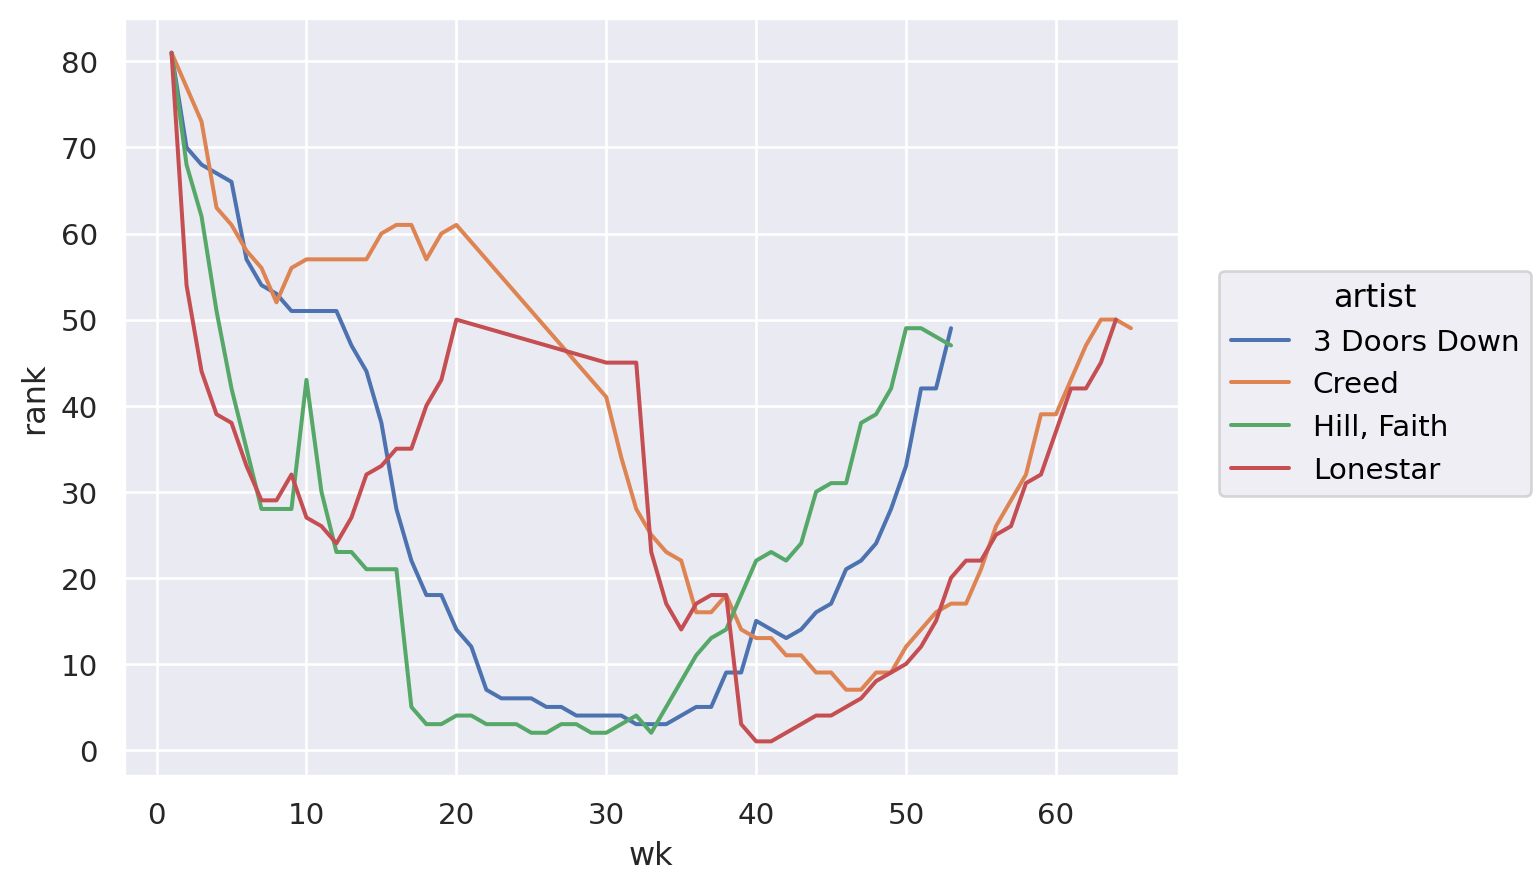

In [15]:
(
    so.Plot(billboard_50, x="wk", y="rank", color="artist")
    .add(so.Line())
)

## 연습문제 6
### (가수별) 곡별로 차트에 머문 기간(weeks)과 가장 높이 올라간 순위를 구해서, 높은 순위를 달성한 곡일수록 차트에 더 오래 머물었는지 알아봅니다.

### 6.1
#### 곡별로 차트에 머문 기간을 DataFrame으로 구하고; .reset_index(name=" ") 이용

In [17]:
# 정답
lengths = (
    billboard_long.groupby('track')['wk']
    .size()
    .reset_index(name = "length")
)
lengths

,track,length
0,(Hot S**t) Country G...,34
1,3 Little Words,9
2,911,19
...,...,...
313,You're A God,21
314,Your Everything,16
315,www.memory,15


In [16]:
weeks_on_chart = billboard_long.groupby("track")["wk"].count().to_frame(name="weeks").reset_index()
weeks_on_chart

,track,weeks
0,(Hot S**t) Country G...,34
1,3 Little Words,9
2,911,19
...,...,...
313,You're A God,21
314,Your Everything,16
315,www.memory,15


### 6.2
#### 곡별로 최상위 순위를 min()을 이용해 DataFrame으로 구한 후

In [19]:
# 정답
highs = (
    billboard_long
    .groupby(['artist', 'track'])['rank']
    .min()
    .reset_index(name = 'high')
)
highs

,artist,track,high
0,2 Pac,Baby Don't Cry (Keep...,72.00
1,2Ge+her,The Hardest Part Of ...,87.00
2,3 Doors Down,Kryptonite,3.00
...,...,...,...
314,Ying Yang Twins,Whistle While You Tw...,74.00
315,Zombie Nation,Kernkraft 400,99.00
316,matchbox twenty,Bent,1.00


In [18]:
best_rank = billboard_long.groupby("track")["rank"].min().to_frame(name="best_rank").reset_index()
best_rank

,track,best_rank
0,(Hot S**t) Country G...,7.00
1,3 Little Words,89.00
2,911,38.00
...,...,...
313,You're A God,23.00
314,Your Everything,51.00
315,www.memory,45.00


### 6.3
#### 이 두 DataFrame을 merge()를 이용해 합친 후

In [20]:
# 정답
lengths_highs = pd.merge(lengths, highs)
lengths_highs

,track,length,artist,high
0,(Hot S**t) Country G...,34,Nelly,7.00
1,3 Little Words,9,Nu Flavor,89.00
2,911,19,"Jean, Wyclef",38.00
...,...,...,...,...
314,You're A God,21,Vertical Horizon,23.00
315,Your Everything,16,"Urban, Keith",51.00
316,www.memory,15,"Jackson, Alan",45.00


In [21]:
combined_df = weeks_on_chart.merge(best_rank, on="track")
combined_df

,track,weeks,best_rank
0,(Hot S**t) Country G...,34,7.00
1,3 Little Words,9,89.00
2,911,19,38.00
...,...,...,...
313,You're A God,21,23.00
314,Your Everything,16,51.00
315,www.memory,15,45.00


### 6.4
#### seaborn.objects를 이용해 머문 기간에 따른 최상위 순위에 대한 관계를 아래와 같이 scatterplot으로 살펴보세요.

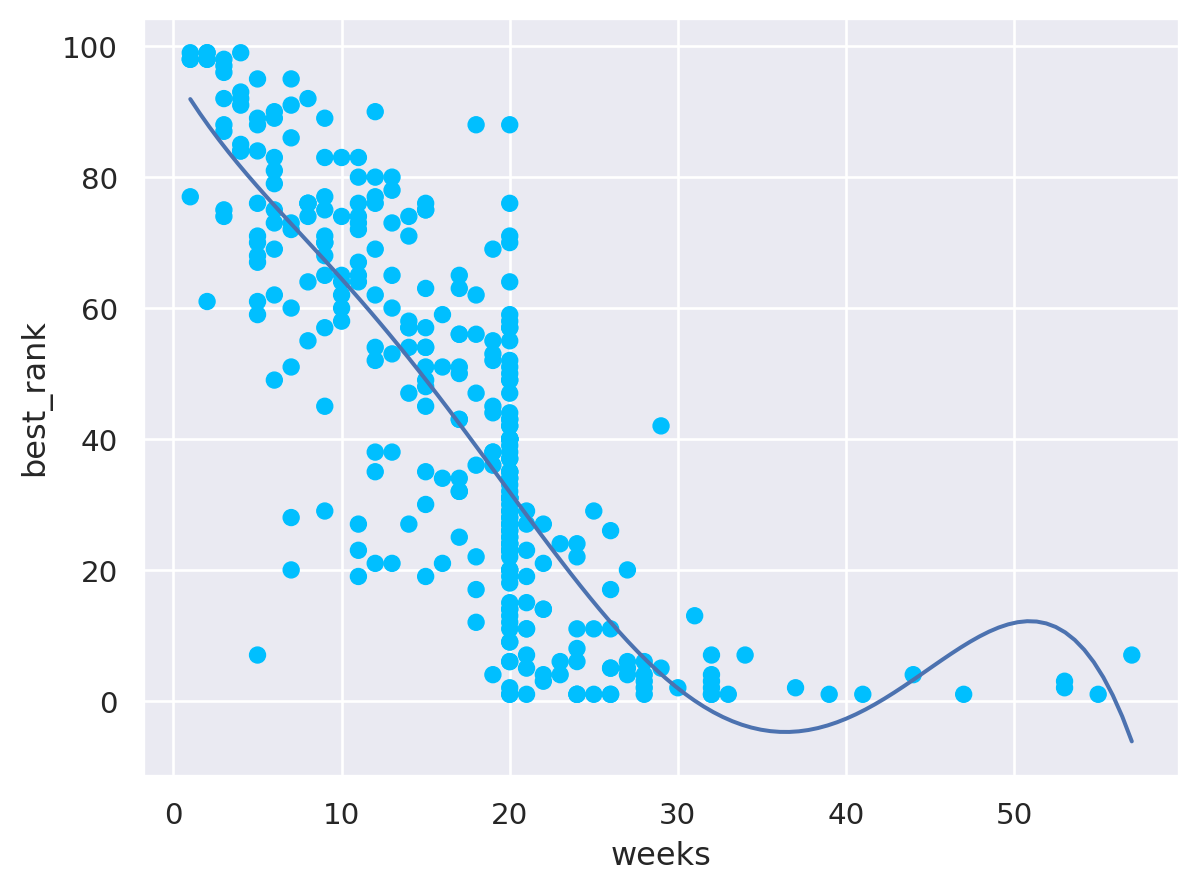

In [22]:
(
    so.Plot(combined_df, x="weeks", y="best_rank")
    .add(so.Dot(color = 'deepskyblue'))
    .add(so.Line(), so.PolyFit(5))
)

# 이 그래프를 분석하시오




### 눈에 띄는 점을 간단히 기술해보세요
#### - 차트에 오래 머문 곡일수록 최고 순위가 높은 경향이 있음.
#### - 차트에 50주 이상 머문 곡 중 최고 순위가 20위 이하인 곡은 없음.
#### - 20주 이상 연속에서 탈락시키는 뭐가 벽같은 게 있다.

## 연습문제 7
### 순위 1위를 달성한 곡들에 한해, 차트에 진입시 순위와 1위에 처음 도달한 주(week)의 정보가 다음과 같이 표시되도록 구해보세요.
### 함수를 만들고; min()과 argmin()이 필요할 수 있음

### apply()로 그 함수를 적용하여 구해보세요.

In [26]:
# 정답 1
def isranked(df, n=1):
    if df["rank"].min() == n:
        idx_rank = df["rank"].argmin()
        idx_wk = df["wk"].argmin()
        return df.iloc[[idx_wk, idx_rank], :]

wk_rank = (
    billboard_long.groupby(["artist", "track"])[["rank", "wk"]]
    .apply(isranked)
    # .reset_index(level=[0, 1])
    # .reset_index().drop(columns="level_2")
)
wk_rank

rank  wk
artist              track                                 
Aaliyah             Try Again               8    59.00   1
                                            4129  1.00  14
Aguilera, Christina Come On Over Baby (A... 11   57.00   1
...                                                ...  ..
Vertical Horizon    Everything You Want     8225  1.00  26
matchbox twenty     Bent                    316  60.00   1
                                            4120  1.00  13

[34 rows x 2 columns]

In [27]:
# 정답 2
# groupby filtering을 이용한 방법
(
    billboard_long.groupby(["artist", "track"])
    .filter(lambda x: x["rank"].min() == 1)  # groupby filtering
    .groupby(["artist", "track"])[["rank", "wk"]]
    .apply(lambda x: x.iloc[[x["wk"].argmin(), x["rank"].argmin()], -2:])
)

rank  wk
artist              track                                 
Aaliyah             Try Again               8    59.00   1
                                            4129  1.00  14
Aguilera, Christina Come On Over Baby (A... 11   57.00   1
...                                                ...  ..
Vertical Horizon    Everything You Want     8225  1.00  26
matchbox twenty     Bent                    316  60.00   1
                                            4120  1.00  13

[34 rows x 2 columns]

In [23]:
import pandas as pd

# 함수 정의
def get_entry_and_peak_week(df):
    # 차트에 처음 진입한 주와 rank 찾기
    entry_week = df['wk'].min()
    entry_rank = df.loc[df['wk'] == entry_week, 'rank'].iloc[0]
    # 1위에 도달한 주와 rank 찾기
    peak_week = df['wk'].iloc[df['rank'].argmin()]
    peak_rank = df['rank'].min()

    return pd.Series({'entry_week': entry_week, 'entry_rank': entry_rank,
                      'peak_week': peak_week, 'peak_rank': peak_rank})

billboard_top = billboard_long
billboard_top_info = billboard_top.groupby(['artist', 'track']).apply(get_entry_and_peak_week)

# 순서 변경
billboard_top_info = billboard_top_info[['entry_week', 'entry_rank', 'peak_week', 'peak_rank']]

billboard_top_info


,,entry_week,entry_rank,peak_week,peak_rank
artist,track,,,,
2 Pac,Baby Don't Cry (Keep...,1.00,87.00,3.00,72.00
2Ge+her,The Hardest Part Of ...,1.00,91.00,2.00,87.00
3 Doors Down,Kryptonite,1.00,81.00,32.00,3.00
...,...,...,...,...,...
Ying Yang Twins,Whistle While You Tw...,1.00,95.00,7.00,74.00
Zombie Nation,Kernkraft 400,1.00,99.00,1.00,99.00
matchbox twenty,Bent,1.00,60.00,13.00,1.00


In [24]:
# 모든 곡에 대해 함수 적용
billboard_top_info = billboard_long.groupby(['artist', 'track']).apply(get_entry_and_peak_week)

# peak_rank가 1인 경우와 그렇지 않은 경우로 분리
peak_rank_1 = billboard_top_info[billboard_top_info['peak_rank'] == 1]

# 각 경우에 대해 인덱스 재설정
peak_rank_1.reset_index(inplace=True)

peak_rank_1

,artist,track,entry_week,entry_rank,peak_week,peak_rank
0,Aaliyah,Try Again,1.00,59.00,14.00,1.00
1,"Aguilera, Christina",Come On Over Baby (A...,1.00,57.00,11.00,1.00
2,"Aguilera, Christina",What A Girl Wants,1.00,71.00,8.00,1.00
...,...,...,...,...,...,...
14,Sisqo,Incomplete,1.00,77.00,8.00,1.00
15,Vertical Horizon,Everything You Want,1.00,70.00,26.00,1.00
16,matchbox twenty,Bent,1.00,60.00,13.00,1.00


In [25]:
# peak_rank가 1인 경우에 해당하는 데이터프레임인 peak_rank_1에 대해 각 곡별로 entry 정보와 peak 정보를 동일하게 유지하면서 행으로 나누기
result_rows = []
for idx, row in peak_rank_1.iterrows():
    entry_info = {'artist': row['artist'], 'track': row['track'], 'wk': row['entry_week'], 'rank': row['entry_rank']}
    peak_info = {'artist': row['artist'], 'track': row['track'], 'wk': row['peak_week'], 'rank': row['peak_rank']}
    result_rows.append(entry_info)
    result_rows.append(peak_info)

# 데이터프레임으로 변환
wk_rank = pd.DataFrame(result_rows)

wk_rank

,artist,track,wk,rank
0,Aaliyah,Try Again,1.00,59.00
1,Aaliyah,Try Again,14.00,1.00
2,"Aguilera, Christina",Come On Over Baby (A...,1.00,57.00
...,...,...,...,...
31,Vertical Horizon,Everything You Want,26.00,1.00
32,matchbox twenty,Bent,1.00,60.00
33,matchbox twenty,Bent,13.00,1.00


## 연습문제 8
### 빠르게 1위가 된 곡일 수록 빠르게 차트에서 사라졌을까를 알아보기 위해, 7번의 결과를 이용해 다음과 같이 변형해보세요.
### 즉, 차트 진입시의 순위 정보와, 1위가 된 week의 정보만을 취해, 그 비율(rate)를 구하면, 얼마나 빠르게 1위가 되었는지 알 수 있습니다.
### 마지막으로, seaborn.objects를 이용해 다음과 같이 시각화해보세요.

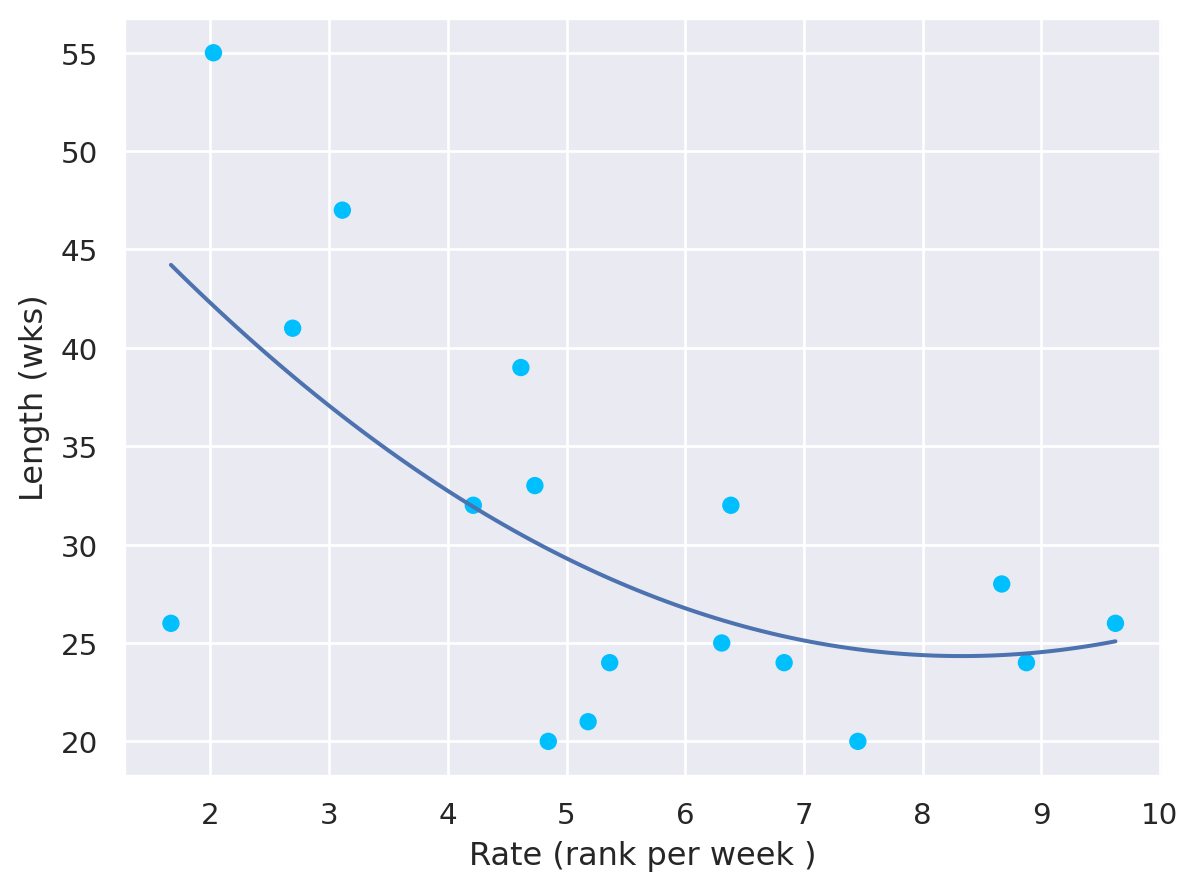

In [31]:
# 정답
wk_rank.groupby(["artist", "track"]).max()

# 한 주에 몇 위 변동했는지 계산
rates = (
    wk_rank.groupby(["artist", "track"])
    .max()
    .assign(rate=lambda x: x["rank"] / x["wk"])
    .reset_index()
)

# 차트에 머무른 기간(주)
lengths = billboard_long.groupby(["artist", "track"]).size().reset_index(name="length")

lengths_rates = pd.merge(rates, lengths)

(
    so.Plot(lengths_rates, x="rate", y="length")
    .add(so.Dot(color="deepskyblue"))
    .add(so.Line(), so.PolyFit(2))
    .label(x="Rate (rank per week )", y="Length (wks)")
)

In [33]:
lengths_rates

,artist,track,wk,rank,rate,length
0,Aaliyah,Try Again,14,59.00,4.21,32
1,"Aguilera, Christina",Come On Over Baby (A...,11,57.00,5.18,21
2,"Aguilera, Christina",What A Girl Wants,8,71.00,8.88,24
...,...,...,...,...,...,...
14,Sisqo,Incomplete,8,77.00,9.62,26
15,Vertical Horizon,Everything You Want,26,70.00,2.69,41
16,matchbox twenty,Bent,13,60.00,4.62,39


In [34]:
wk_rank = wk_rank.groupby(['artist', 'track']).agg(
    wk=pd.NamedAgg(column='wk', aggfunc='max'),
    rank=pd.NamedAgg(column='rank', aggfunc='max'),
)

wk_rank['rate'] = wk_rank['rank'] / wk_rank['wk']
wk_rank.reset_index(inplace=True)

# 차트에 머무른 기간이 없었음.
lengths = billboard_long.groupby(["artist", "track"]).size().reset_index(name="length")

wk_rank = pd.merge(wk_rank, lengths)

wk_rank


,artist,track,wk,rank,rate,length
0,Aaliyah,Try Again,14,59.00,4.21,32
1,"Aguilera, Christina",Come On Over Baby (A...,11,57.00,5.18,21
2,"Aguilera, Christina",What A Girl Wants,8,71.00,8.88,24
...,...,...,...,...,...,...
14,Sisqo,Incomplete,8,77.00,9.62,26
15,Vertical Horizon,Everything You Want,26,70.00,2.69,41
16,matchbox twenty,Bent,13,60.00,4.62,39


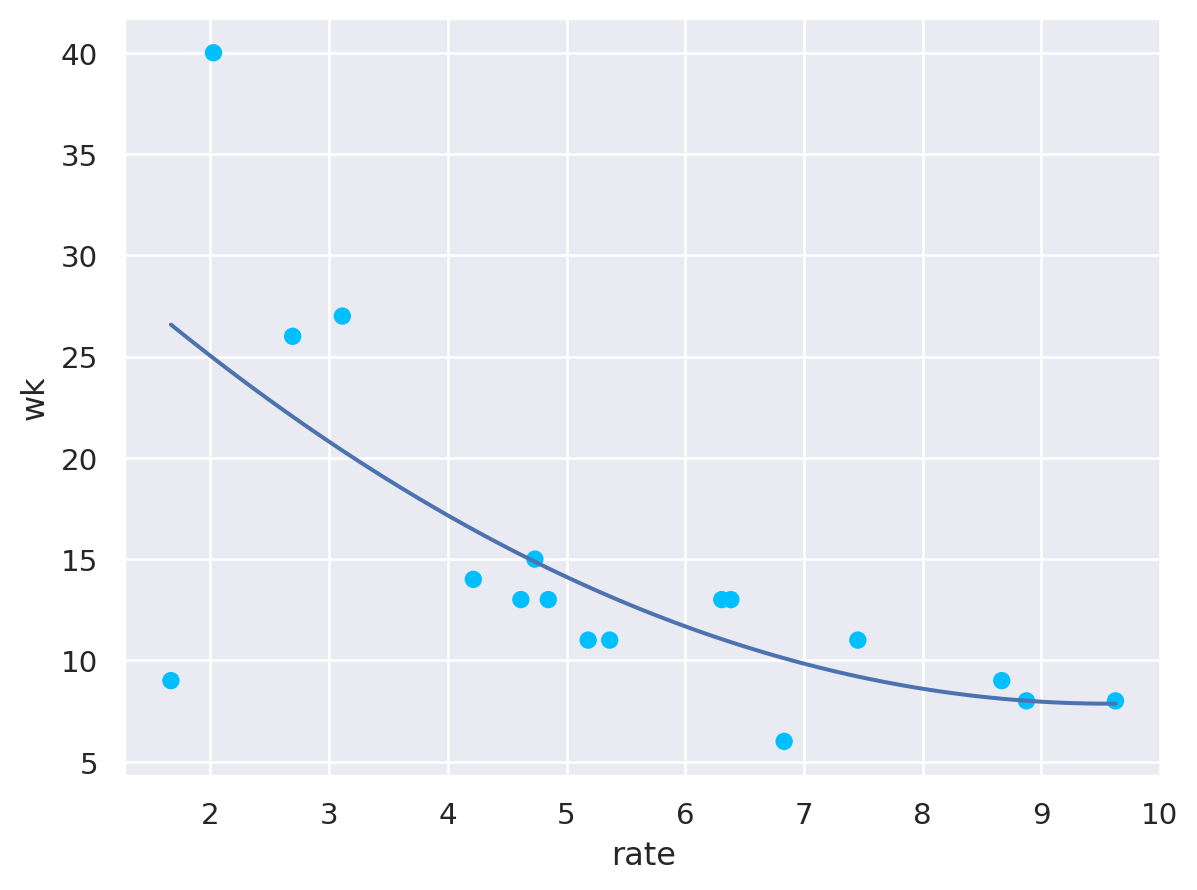

In [29]:
# y에 length를 써야 했는데 wk를 씀..
(
    so.Plot(wk_rank, x="rate", y="length")
    .add(so.Dot(color = 'deepskyblue'))
    .add(so.Line(), so.PolyFit(2))
)